In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../Data/final_data/abruzzo.csv')

df.Date = pd.to_datetime(df.Date)

df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df = df[280:]

display(df)

,Region,Infrastructure,ResidenceCountry,Date,Arrivals,Attendance,Year,Month
280,Abruzzo,HOTELLIKE,Italia,2008-01-01,88624.0,257703.0,2008,1
281,Abruzzo,HOTELLIKE,Paesi esteri,2008-01-01,5346.0,19124.0,2008,1
282,Abruzzo,OTHER,Italia,2008-01-01,5701.0,20039.0,2008,1
283,Abruzzo,OTHER,Paesi esteri,2008-01-01,202.0,2600.0,2008,1
284,Chieti,HOTELLIKE,Italia,2008-01-01,13790.0,37455.0,2008,1
...,...,...,...,...,...,...,...,...
3635,Pescara,OTHER,Paesi esteri,2021-12-01,145.0,409.0,2021,12
3636,Teramo,HOTELLIKE,Italia,2021-12-01,7582.0,19674.0,2021,12
3637,Teramo,HOTELLIKE,Paesi esteri,2021-12-01,410.0,1761.0,2021,12
3638,Teramo,OTHER,Italia,2021-12-01,1333.0,4437.0,2021,12


In [6]:
def make_mask(df:pd.DataFrame, region:str, infrastructure:str, residence:str):
    df = df[(df['Region'] == region) & (df['Infrastructure'] == infrastructure) & (df['ResidenceCountry']==residence)]
    return df

In [7]:
df_abr_hotel_ita = make_mask(df, 'Abruzzo', 'HOTELLIKE', 'Italia')

display(df_abr_hotel_ita)

,Region,Infrastructure,ResidenceCountry,Date,Arrivals,Attendance,Year,Month
280,Abruzzo,HOTELLIKE,Italia,2008-01-01,88624.0,257703.0,2008,1
300,Abruzzo,HOTELLIKE,Italia,2008-02-01,100147.0,269014.0,2008,2
320,Abruzzo,HOTELLIKE,Italia,2008-03-01,84219.0,221282.0,2008,3
340,Abruzzo,HOTELLIKE,Italia,2008-04-01,72917.0,162002.0,2008,4
360,Abruzzo,HOTELLIKE,Italia,2008-05-01,87828.0,202270.0,2008,5
...,...,...,...,...,...,...,...,...
3540,Abruzzo,HOTELLIKE,Italia,2021-08-01,230100.0,1046762.0,2021,8
3560,Abruzzo,HOTELLIKE,Italia,2021-09-01,104274.0,336010.0,2021,9
3580,Abruzzo,HOTELLIKE,Italia,2021-10-01,58755.0,110749.0,2021,10
3600,Abruzzo,HOTELLIKE,Italia,2021-11-01,41724.0,79169.0,2021,11


In [8]:
df_abr_hotel_ita.describe()

,Arrivals,Attendance,Year,Month
count,168.000000,1.680000e+02,168.00000,168.000000
mean,88117.488095,3.098346e+05,2014.50000,6.500000
std,47858.351313,2.882704e+05,4.04318,3.462373
min,1265.000000,1.084800e+04,2008.00000,1.000000
25%,60538.750000,1.361572e+05,2011.00000,3.750000
50%,73667.000000,1.780095e+05,2014.50000,6.500000
75%,94085.250000,3.434810e+05,2018.00000,9.250000
max,234962.000000,1.122970e+06,2021.00000,12.000000


In [10]:
# Classe per creare grafici a dispersione e tracciato
class Plot:
  def __init__(self, sizex:int, sizey:int):
    self.x = np.zeros(sizex)
    self.y = np.zeros(sizey)

  #label nome associato alla legenda dei dati che verranno rappresentati
  def tracciato(self, x:np.array, y:np.array, label:str, colore:str):
    self.x = x
    self.y = y
    plt.plot(self.x, self.y, label=label, color=colore)

  def dispersione(self, x:np.array, y:np.array, label:str,
                  colore:str, dimensione:np.int64, trasparenza: np.float64):
    self.x = x
    self.y = y
    plt.scatter(self.x, self.y, label=label, color=colore,
                s=dimensione, alpha=trasparenza)

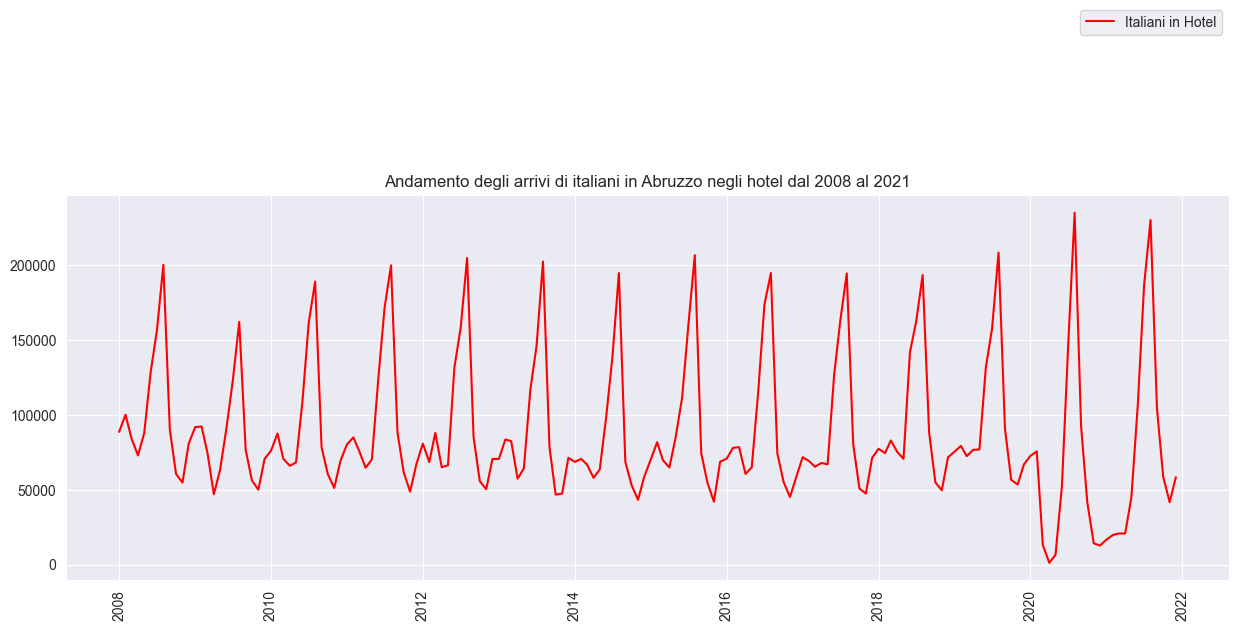

In [13]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
arrivals_abruzzo = Plot(df_abr_hotel_ita.Date.size, df_abr_hotel_ita['Arrivals'].size)
arrivals_abruzzo.tracciato(df_abr_hotel_ita.Date, df_abr_hotel_ita['Arrivals'], "Italiani in Hotel", "red")
plt.title("Andamento degli arrivi di italiani in Abruzzo negli hotel dal 2008 al 2021")
plt.legend(bbox_to_anchor=(1, 1.50))
plt.show()

In [14]:
def normal_distribution_limits(data: pd.DataFrame):
  mean = data.mean()
  std  = data.std()

  up_limit = mean + std
  low_limit = mean - std

  return mean, up_limit, low_limit

def plot_normal_distribution(data: pd.DataFrame, mean: float, up_limit: float, low_limit: float):
    plt.figure(figsize=(12, 8))
    plt.scatter(np.arange(len(data)),data, alpha=0.5)
    # terza deviazione standard postitiva
    plt.axhline(up_limit, color = 'brown', linestyle = '-', label='up limit')
    # media
    plt.axhline(mean, color = 'r', linestyle = '-', label='mean')
    # terza deviazione standard negativa
    plt.axhline(low_limit, color = 'brown', linestyle = '-', label='low limit')
    plt.legend()
    plt.show()

def interquartile_range_limits(data: pd.DataFrame):
  q25 = data.quantile(0.25)
  q75 = data.quantile(0.75)

  iqr  = (q75 - q25)
  up_limit  = q75 + iqr * 1.5
  low_limit = q25 - iqr * 1.5

  return up_limit, low_limit

def plot_generic_distribution(data: pd.DataFrame,  up_limit: float, low_limit: float) :
  plt.figure(figsize=(12, 8))
  plt.scatter(np.arange(len(data)),data, alpha=0.5)
  # up limit
  plt.axhline(up_limit, color = 'brown', linestyle = '-', label='up_limit')
  # low limit
  plt.axhline(low_limit, color = 'brown', linestyle = '-', label = 'low limit')
  plt.legend()
  plt.show()

def plot_scatter(data):
  plt.figure(figsize=(12, 8))
  plt.scatter(np.arange(len(data)),data, alpha=0.5)
  plt.show()

In [26]:
df_abr_hotel_ita_2020 = df_abr_hotel_ita[df_abr_hotel_ita['Year'] >= 2020]['Arrivals']
df_abr_hotel_ita_2020.describe()
display(df_abr_hotel_ita_2020)

3160     72631.0
3180     75642.0
3200     13115.0
3220      1265.0
3240      6532.0
3260     52666.0
3280    146351.0
3300    234962.0
3320     92529.0
3340     41474.0
3360     14262.0
3380     12765.0
3400     16724.0
3420     19810.0
3440     20818.0
3460     20817.0
3480     44988.0
3500    107087.0
3520    186281.0
3540    230100.0
3560    104274.0
3580     58755.0
3600     41724.0
3620     58441.0
Name: Arrivals, dtype: float64

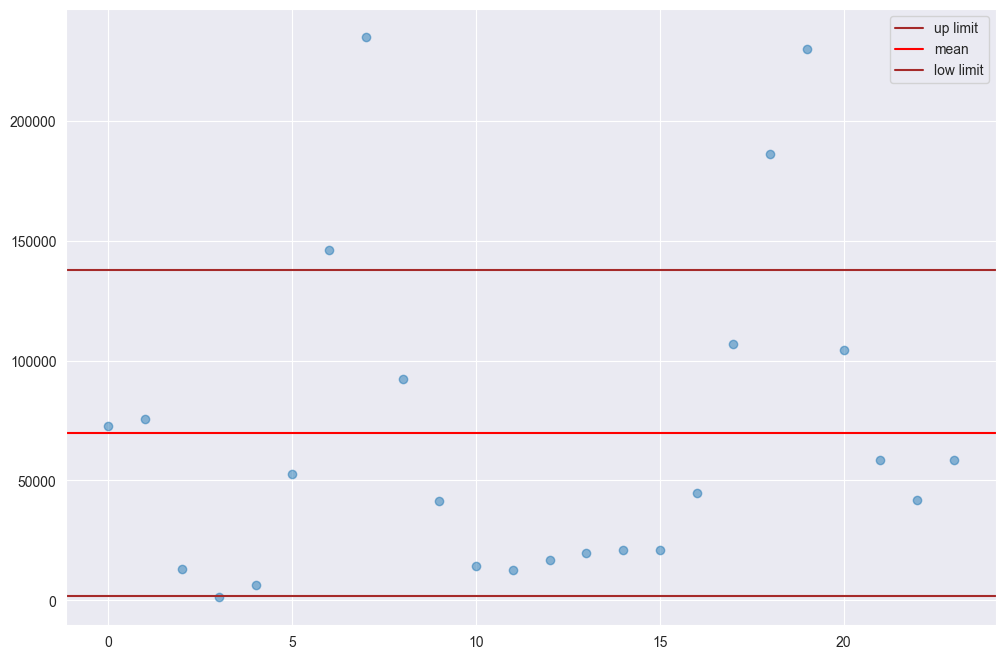

In [29]:
# limiti della terza deviazione standard
enginesize_mean, enginesize_up_limit, enginesize_low_limit = normal_distribution_limits(df_abr_hotel_ita_2020)

# plot
plot_normal_distribution(df_abr_hotel_ita_2020, enginesize_mean, enginesize_up_limit, enginesize_low_limit)

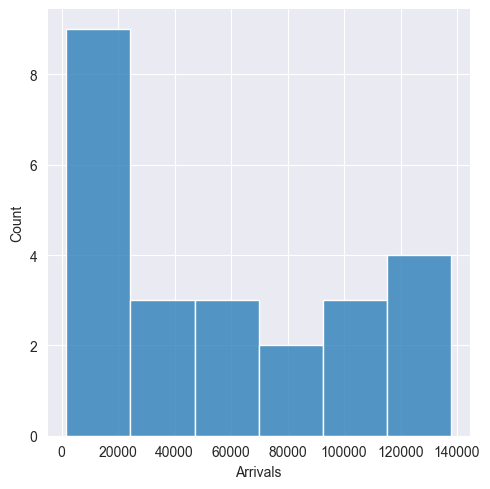

In [30]:
# # cut
tmp_enginesize = df_abr_hotel_ita_2020.to_numpy()
tmp_enginesize[tmp_enginesize > enginesize_up_limit]  = enginesize_up_limit
tmp_enginesize[tmp_enginesize < enginesize_low_limit] = enginesize_low_limit

# plot
sns.displot(df_abr_hotel_ita_2020)
plt.show()

In [31]:
df_abr_hotel_ita_2020.describe()

count        24.000000
mean      59504.083662
std       46708.271541
min        1653.441811
25%       19038.500000
50%       48827.000000
75%       95465.250000
max      137847.641522
Name: Arrivals, dtype: float64